In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join(".", "results_v3.tsv"), header=0, sep="\t")
df.tail()

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
6022,pp126,F,41,MS,Fast,NaN,left_ankle,IC,182.0,177.0,5.0,25.0,1,1,1,0,0,1
6023,pp126,F,41,MS,Fast,NaN,left_ankle,IC,425.0,426.0,-1.0,-5.0,1,1,1,0,0,1
6024,pp126,F,41,MS,Fast,NaN,left_ankle,IC,654.0,655.0,-1.0,-5.0,1,1,1,0,0,1
6025,pp126,F,41,MS,Fast,NaN,left_ankle,IC,877.0,876.0,1.0,5.0,1,1,1,0,0,1
6026,pp126,F,41,MS,Fast,NaN,left_ankle,FC,74.0,74.0,0.0,0.0,1,1,1,0,0,1


In [3]:
for item in df["run"].unique():
    if not isinstance(item, str):
        print(np.isnan(item))
    else:
        print(f"Run: {item:s}")

True
Run: off
Run: on
Run: schub


In [51]:
df_gait_metrics = {"sub_id": [],
                   "gender": [],
                   "age": [],
                   "participant_type": [],
                   "task": [],
                   "run": [],
                   "tracked_point": [],
                   "ix_ref": [],
                   "ix_pred": [],
                   "stride_time_ref": [],
                   "stride_time_pred": [],
                   "stance_time_ref": [],
                   "stance_time_pred": [],
                   "swing_time_ref": [],
                   "swing_time_pred": []}

for sub_id in df["sub_id"].unique():
    # print(f"{sub_id}")
    df_sel = df.loc[df["sub_id"]==sub_id]
    for task in df_sel["task"].unique():
        # print(f"    {task:s}")
        df_sel = df.loc[(df["sub_id"]==sub_id) & (df["task"]==task)]
        for run in df_sel["run"].unique():
            if not isinstance(run, str):
                for tracked_point in df_sel["tracked_point"].unique():
                    # print(f"        {tracked_point}")
                    df_sel = df.loc[(df["sub_id"]==sub_id) & (df["task"]==task) & (df["run"].isna()) & (df["tracked_point"]==tracked_point)]
                    gender = df_sel["gender"].iloc[0]
                    age = df_sel["age"].iloc[0]
                    participant_type = df_sel["participant_type"].iloc[0]
                    if not(df_sel[["ix_ref", "ix_pred"]].isna().any().any()):
                        ix_IC_ref = np.sort(df_sel.loc[df_sel["event_type"]=="IC"]["ix_ref"].values[:])
                        ix_IC_pred = np.sort(df_sel.loc[df_sel["event_type"]=="IC"]["ix_pred"].values[:])
                        ix_FC_ref = np.sort(df_sel.loc[df_sel["event_type"]=="FC"]["ix_ref"].values[:])
                        ix_FC_pred = np.sort(df_sel.loc[df_sel["event_type"]=="FC"]["ix_pred"].values[:])
                        if len(ix_IC_ref)==0 or len(ix_IC_pred)==0 or len(ix_FC_ref)==0 or len(ix_FC_pred)==0:
                            continue
                        for i in range(len(ix_IC_ref)-1):
                            stride_time_ref = ( ix_IC_ref[i+1] - ix_IC_ref[i] ) / 200
                            stride_time_pred = ( ix_IC_pred[i+1] - ix_IC_pred[i] ) / 200
                            f = np.argwhere(ix_FC_ref > ix_IC_ref[i])[:,0][0]
                            stance_time_ref = ( ix_FC_ref[f] - ix_IC_ref[i] ) / 200
                            stance_time_pred = ( ix_FC_pred[f] - ix_IC_pred[i] ) / 200
                            swing_time_ref = ( ix_IC_ref[i+1] - ix_FC_ref[f] ) / 200
                            swing_time_pred = ( ix_IC_pred[i+1] - ix_FC_pred[f] ) / 200
                            
                            # Add to dict
                            df_gait_metrics["sub_id"].append(sub_id)
                            df_gait_metrics["gender"].append(gender)
                            df_gait_metrics["age"].append(age)
                            df_gait_metrics["participant_type"].append(participant_type)
                            df_gait_metrics["task"].append(task)
                            df_gait_metrics["run"].append("")
                            df_gait_metrics["tracked_point"].append(tracked_point)
                            df_gait_metrics["ix_ref"].append(ix_IC_ref[i])
                            df_gait_metrics["ix_pred"].append(ix_IC_pred[i])
                            df_gait_metrics["stride_time_ref"].append(stride_time_ref)
                            df_gait_metrics["stride_time_pred"].append(stride_time_pred)
                            df_gait_metrics["stance_time_ref"].append(stance_time_ref)
                            df_gait_metrics["stance_time_pred"].append(stance_time_pred)
                            df_gait_metrics["swing_time_ref"].append(swing_time_ref)
                            df_gait_metrics["swing_time_pred"].append(swing_time_pred)
            else:
                print(f"{run}")
                df_sel = df.loc[(df["sub_id"]==sub_id) & (df["task"]==task) & (df["run"]==run)]
                for tracked_point in df_sel["tracked_point"].unique():
                    # print(f"        {tracked_point}")
                    df_sel = df.loc[(df["sub_id"]==sub_id) & (df["task"]==task) & (df["run"]==run) & (df["tracked_point"]==tracked_point)]
                    gender = df_sel["gender"].iloc[0]
                    age = df_sel["age"].iloc[0]
                    participant_type = df_sel["participant_type"].iloc[0]
                    if not(df_sel[["ix_ref", "ix_pred"]].isna().any().any()):
                        ix_IC_ref = np.sort(df_sel.loc[df_sel["event_type"]=="IC"]["ix_ref"].values[:])
                        ix_IC_pred = np.sort(df_sel.loc[df_sel["event_type"]=="IC"]["ix_pred"].values[:])
                        ix_FC_ref = np.sort(df_sel.loc[df_sel["event_type"]=="FC"]["ix_ref"].values[:])
                        ix_FC_pred = np.sort(df_sel.loc[df_sel["event_type"]=="FC"]["ix_pred"].values[:])
                        if len(ix_IC_ref)==0 or len(ix_IC_pred)==0 or len(ix_FC_ref)==0 or len(ix_FC_pred)==0:
                            continue
                        for i in range(len(ix_IC_ref)-1):
                            stride_time_ref = ( ix_IC_ref[i+1] - ix_IC_ref[i] ) / 200
                            stride_time_pred = ( ix_IC_pred[i+1] - ix_IC_pred[i] ) / 200
                            f = np.argwhere(ix_FC_ref > ix_IC_ref[i])[:,0][0]
                            stance_time_ref = ( ix_FC_ref[f] - ix_IC_ref[i] ) / 200
                            stance_time_pred = ( ix_FC_pred[f] - ix_IC_pred[i] ) / 200
                            swing_time_ref = ( ix_IC_ref[i+1] - ix_FC_ref[f] ) / 200
                            swing_time_pred = ( ix_IC_pred[i+1] - ix_FC_pred[f] ) / 200
                            
                            # Add to dict
                            df_gait_metrics["sub_id"].append(sub_id)
                            df_gait_metrics["gender"].append(gender)
                            df_gait_metrics["age"].append(age)
                            df_gait_metrics["participant_type"].append(participant_type)
                            df_gait_metrics["task"].append(task)
                            df_gait_metrics["run"].append(run)
                            df_gait_metrics["tracked_point"].append(tracked_point)
                            df_gait_metrics["ix_ref"].append(ix_IC_ref[i])
                            df_gait_metrics["ix_pred"].append(ix_IC_pred[i])
                            df_gait_metrics["stride_time_ref"].append(stride_time_ref)
                            df_gait_metrics["stride_time_pred"].append(stride_time_pred)
                            df_gait_metrics["stance_time_ref"].append(stance_time_ref)
                            df_gait_metrics["stance_time_pred"].append(stance_time_pred)
                            df_gait_metrics["swing_time_ref"].append(swing_time_ref)
                            df_gait_metrics["swing_time_pred"].append(swing_time_pred) 
                    

off
off
off
off
on
off
on
on
on
off
off
on
off
on
off
on
off
on
off
on
on
on
on
off
off
off
schub
schub
schub
on
off
off
on
off
on
on
on
on
off
off
off


In [52]:
df_gait_metrics = pd.DataFrame(df_gait_metrics)

In [53]:
df_gait_metrics.to_csv("gait_metrics_v3.tsv", sep="\t")

In [54]:
import statsmodels.api as sm

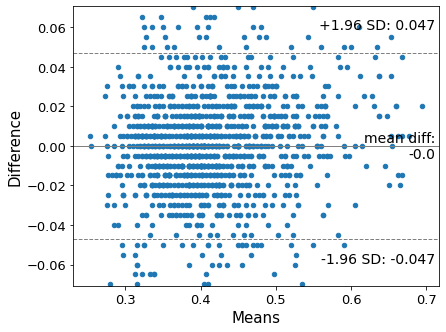

In [55]:
cm = 1/2.54
fig, ax = plt.subplots(1, figsize=(16*cm, 12*cm))
sm.graphics.mean_diff_plot(df_gait_metrics.swing_time_ref, df_gait_metrics.swing_time_pred, ax=ax)
plt.show()

In [50]:
sub_id = "pp058"
task = "Slow"
df.loc[(df["sub_id"]==sub_id) & (df["task"]==task) & (df["run"]=="schub") & (df["tracked_point"]=="right_ankle")]

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
2601,pp058,M,24,MS,Slow,schub,right_ankle,IC,5.0,6.0,-1.0,-5.0,1,1,1,0,0,1
2602,pp058,M,24,MS,Slow,schub,right_ankle,IC,417.0,401.0,16.0,80.0,1,1,1,0,0,1
2603,pp058,M,24,MS,Slow,schub,right_ankle,IC,746.0,738.0,8.0,40.0,1,1,1,0,0,1
2604,pp058,M,24,MS,Slow,schub,right_ankle,IC,1071.0,1081.0,-10.0,-50.0,1,1,1,0,0,1
2605,pp058,M,24,MS,Slow,schub,right_ankle,IC,1405.0,1403.0,2.0,10.0,1,1,1,0,0,1
2606,pp058,M,24,MS,Slow,schub,right_ankle,IC,1742.0,1737.0,5.0,25.0,1,1,1,0,0,1
2607,pp058,M,24,MS,Slow,schub,right_ankle,IC,2040.0,2038.0,2.0,10.0,1,1,1,0,0,1
2608,pp058,M,24,MS,Slow,schub,right_ankle,IC,2366.0,2362.0,4.0,20.0,1,1,1,0,0,1
2609,pp058,M,24,MS,Slow,schub,right_ankle,IC,2696.0,2696.0,0.0,0.0,1,1,1,0,0,1
2610,pp058,M,24,MS,Slow,schub,right_ankle,IC,3043.0,3043.0,0.0,0.0,1,1,1,0,0,1


In [37]:
ix_IC_ref = np.sort(df.loc[(df["sub_id"]==sub_id) & (df["task"]==task) & (df["run"].isna()) & (df["tracked_point"]=="right_ankle") & (df["event_type"]=="IC")]["ix_ref"].values[:])
ix_IC_pred = np.sort(df.loc[(df["sub_id"]==sub_id) & (df["task"]==task) & (df["run"].isna()) & (df["tracked_point"]=="right_ankle") & (df["event_type"]=="IC")]["ix_pred"].values[:])
ix_FC_ref = np.sort(df.loc[(df["sub_id"]==sub_id) & (df["task"]==task) & (df["run"].isna()) & (df["tracked_point"]=="right_ankle") & (df["event_type"]=="FC")]["ix_ref"].values[:])
ix_FC_pred = np.sort(df.loc[(df["sub_id"]==sub_id) & (df["task"]==task) & (df["run"].isna()) & (df["tracked_point"]=="right_ankle") & (df["event_type"]=="FC")]["ix_pred"].values[:])

In [38]:
ix_IC_ref

array([ 323.,  797., 1287., 1749., 2187., 2589.])

In [39]:
ix_FC_ref

array([ 227.,  707., 1190., 1657., 2117., 2489., 2921.])

In [44]:
for i in range(len(ix_IC_ref)-1):
    stride_time_ref = (ix_IC_ref[i+1] - ix_IC_ref[i]) / 200
    stride_time_pred = (ix_IC_pred[i+1] - ix_IC_pred[i]) / 200
    print(f"Stride time: {stride_time_ref:.3f} {stride_time_pred:.3f}")
    f = np.argwhere(ix_FC_ref > ix_IC_ref[i])[:,0][0]
    stance_time_ref = (ix_FC_ref[f] - ix_IC_ref[i]) / 200
    stance_time_pred = (ix_FC_pred[f] - ix_IC_ref[i]) / 200
    print(f"Stance time: {stance_time_ref:.3f} {stance_time_pred:.3f}")
    swing_time_ref = (ix_IC_ref[i+1] - ix_FC_ref[f]) / 200
    swing_time_pred = (ix_IC_pred[i+1] - ix_FC_pred[f]) / 200
    print(f"Swing time: {swing_time_ref:.3f} {swing_time_pred:.3f}")

Stride time: 2.370 2.380
Stance time: 1.920 1.935
Swing time: 0.450 0.435
Stride time: 2.450 2.460
Stance time: 1.965 1.980
Swing time: 0.485 0.480
Stride time: 2.310 2.305
Stance time: 1.850 1.865
Swing time: 0.460 0.450
Stride time: 2.190 2.205
Stance time: 1.840 1.855
Swing time: 0.350 0.355
Stride time: 2.010 1.980
Stance time: 1.510 1.520
Swing time: 0.500 0.480
